In [6]:
%matplotlib inline

import os 
import pandas as pd
import numpy as np
import seaborn as sns
from nltools.data import Brain_Data, Groupby, Adjacency
import glob
from nltools.mask import create_sphere
import matplotlib.pyplot as plt
from nltools.datasets import download_collection

base_dir = '/Users/daisyburr/Dropbox/Dartmouth/Research/Whalen/Projects/WhichFear/Replication/Luke/nilearn_data/WHICHFEAR'
filelist = glob.glob(os.path.join(base_dir,'SUBJECTS','*.nii'))

In [ ]:
#ONE-TO-ONE CONDITIONS=====================================================

In [7]:
#anxiety v dominance=======================================================

In [8]:
#define anxiety data
anxiety_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*anxiety.nii')))

In [9]:
#check length
len(anxiety_data)

41

In [10]:
anxiety_data

nltools.data.brain_data.Brain_Data(data=(41, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [11]:
#define dominance data
dominance_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*dominance.nii')))

In [12]:
dominance_data

nltools.data.brain_data.Brain_Data(data=(41, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [13]:
#define anx dom data
anx_dom_data = anxiety_data.append(dominance_data)

In [14]:
#check length
len(anx_dom_data)

82

In [15]:
#create new subject id df
subject_id = pd.DataFrame(np.concatenate([range(1,42),range(1,42)]))

In [16]:
anx_dom_data.Y = pd.DataFrame(np.concatenate([np.ones(len(anxiety_data)),
                                               np.zeros(len(dominance_data))]))

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.50


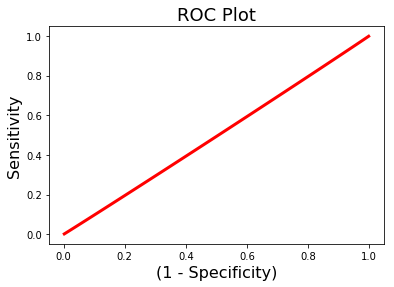

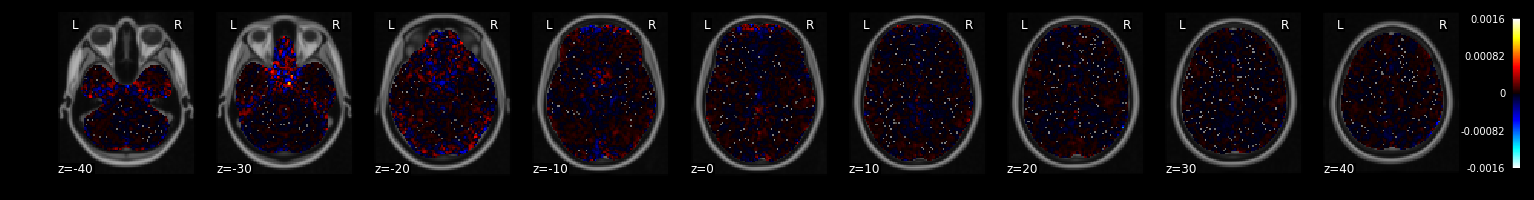

In [17]:
anx_dom_svm_stats = anx_dom_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.54
Accuracy SE:        0.06
Accuracy p-value:   0.58
Sensitivity:        0.39
Specificity:        0.68
AUC:                0.48
PPV:                0.55
------------------------


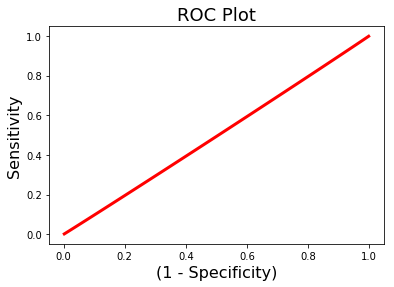

In [18]:
from nltools.analysis import Roc

roc = Roc(input_values=anx_dom_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=anx_dom_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#empathy v dominance=========================================

In [ ]:
#use same dominance
#dominance_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*dominance.nii')))

In [ ]:
#use same sub id df
#subject_id = pd.DataFrame(np.concatenate([range(1,42),range(1,42)]))

In [19]:
#define empathy data
empathy_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*empathy.nii')))

In [20]:
#define emp dom data
emp_dom_data = empathy_data.append(dominance_data)

In [21]:
emp_dom_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(empathy_data)),
                                               np.zeros(len(dominance_data))]))

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.52


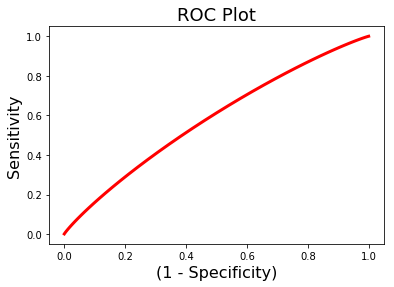

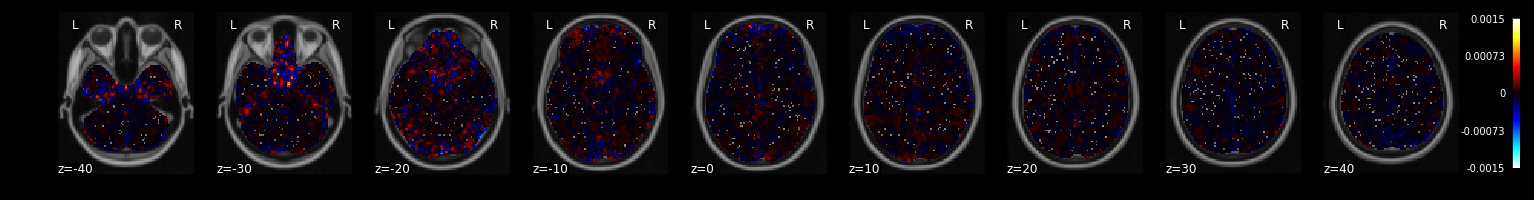

In [22]:
emp_dom_svm_stats = emp_dom_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.62
Accuracy SE:        0.07
Accuracy p-value:   0.04
Sensitivity:        0.68
Specificity:        0.56
AUC:                0.57
PPV:                0.61
------------------------


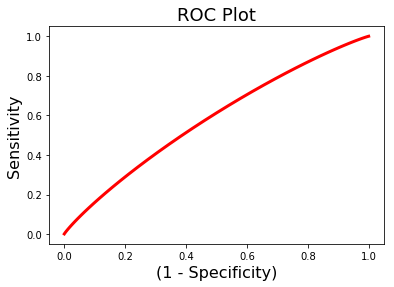

In [23]:
from nltools.analysis import Roc

roc = Roc(input_values=emp_dom_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=emp_dom_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#anx v empathy==================================================

In [ ]:
#use same sub id df
#subject_id = pd.DataFrame(np.concatenate([range(1,42),range(1,42)]))

In [ ]:
#use same emp data
#empathy_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*empathy.nii')))

In [ ]:
#use same anx data
#anxiety_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*anxiety.nii')))

In [24]:
#define anx emp data
anx_emp_data = anxiety_data.append(empathy_data)

In [25]:
anx_emp_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(anxiety_data)),
                                               np.zeros(len(empathy_data))]))

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.51


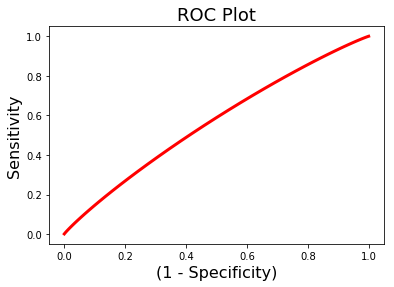

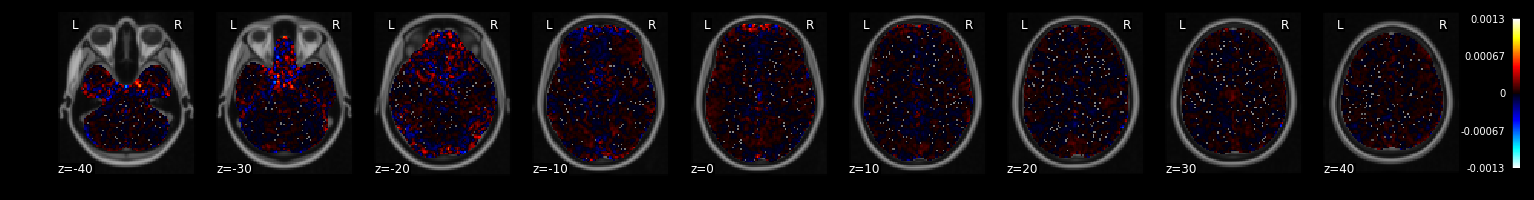

In [26]:
anx_emp_svm_stats = anx_emp_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.56
Accuracy SE:        0.06
Accuracy p-value:   0.32
Sensitivity:        0.37
Specificity:        0.76
AUC:                0.53
PPV:                0.60
------------------------


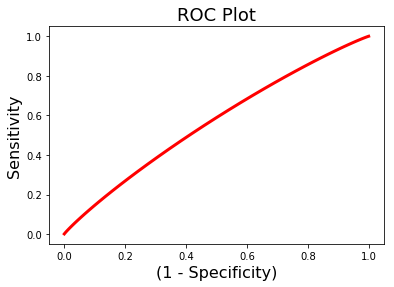

In [27]:
roc = Roc(input_values=anx_emp_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=anx_emp_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#CON VERSUS UNLABELED==========================================================================

In [28]:
#anxiety v unlabeled

In [29]:
#use same anx data
#anxiety_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*anxiety.nii')))

In [30]:
#use same sub id
#subject_id = pd.DataFrame(np.concatenate([range(1,42),range(1,42)]))

In [31]:
#define unlabeled data
unlabeled_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*unlabeled.nii')))

In [156]:
unlabeled_data

nltools.data.brain_data.Brain_Data(data=(41, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [157]:
#define unlabeled anx data
unlabeled_anx_data = unlabeled_data.append(anxiety_data)

In [158]:
unlabeled_anx_data

nltools.data.brain_data.Brain_Data(data=(82, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [161]:
unlabeled_anx_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(anxiety_data)),
                                               np.zeros(len(unlabeled_data))]))

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.66


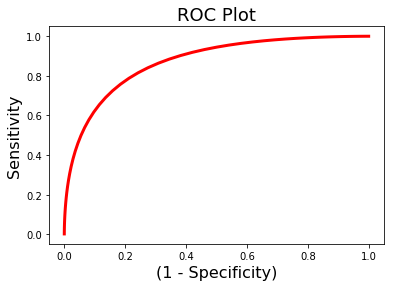

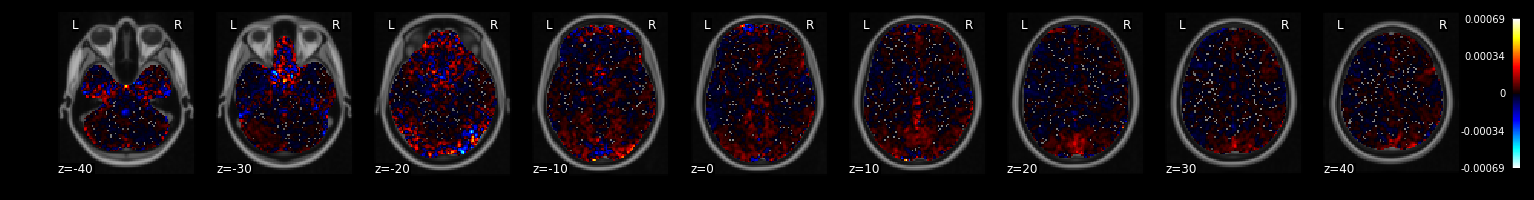

In [162]:
anx_unl_svm_stats = unlabeled_anx_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.70
Accuracy SE:        0.08
Accuracy p-value:   0.00
Sensitivity:        0.46
Specificity:        0.93
AUC:                0.76
PPV:                0.86
------------------------


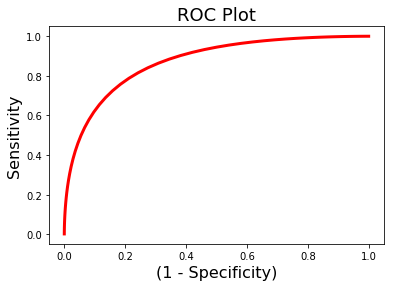

In [178]:
roc = Roc(input_values=anx_unl_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=anx_unl_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#empathy v unlabeled

In [ ]:
#use same sub id df
#subject_id = pd.DataFrame(np.concatenate([range(1,42),range(1,42)]))

In [ ]:
#unlabeled_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*unlabeled.nii')))

In [ ]:
#empathy_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*empathy.nii')))

In [164]:
#define unlabeled emp data
unlabeled_emp_data = unlabeled_data.append(empathy_data)

In [165]:
unlabeled_emp_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(empathy_data)),
                                               np.zeros(len(unlabeled_data))]))

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.78


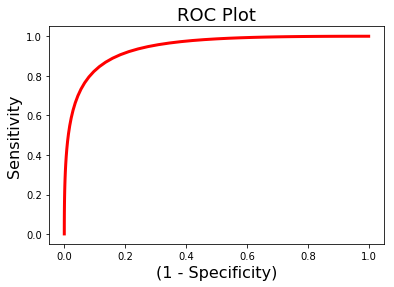

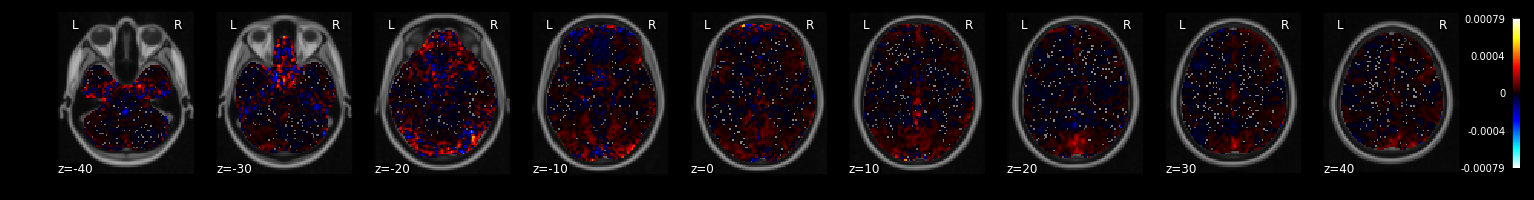

In [168]:
emp_unl_svm_stats = unlabeled_emp_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.78
Accuracy SE:        0.09
Accuracy p-value:   0.00
Sensitivity:        0.78
Specificity:        0.78
AUC:                0.83
PPV:                0.78
------------------------


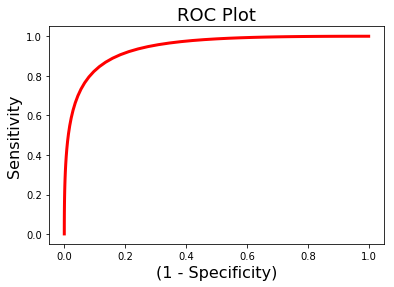

In [177]:
roc = Roc(input_values=emp_unl_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=emp_unl_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#dominance v unlabeled

In [ ]:
#use same sub id df
#subject_id = pd.DataFrame(np.concatenate([range(1,42),range(1,42)]))

In [62]:
#use same unlabeled data
#unlabeled_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*unlabeled.nii')))

In [ ]:
#use same dom data
#dominance_data = Brain_Data(glob.glob(os.path.join(base_dir,'SUBJECTS','*dominance.nii')))

In [54]:
#define unl dom data
unlabeled_dom_data = unlabeled_data.append(dominance_data)

In [55]:
unlabeled_dom_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(dominance_data)),
                                               np.zeros(len(unlabeled_data))]))

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.74


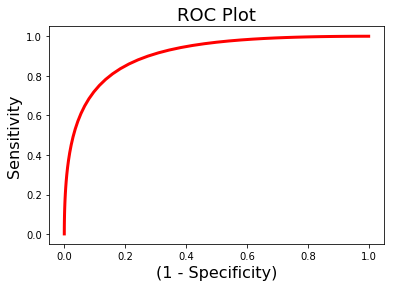

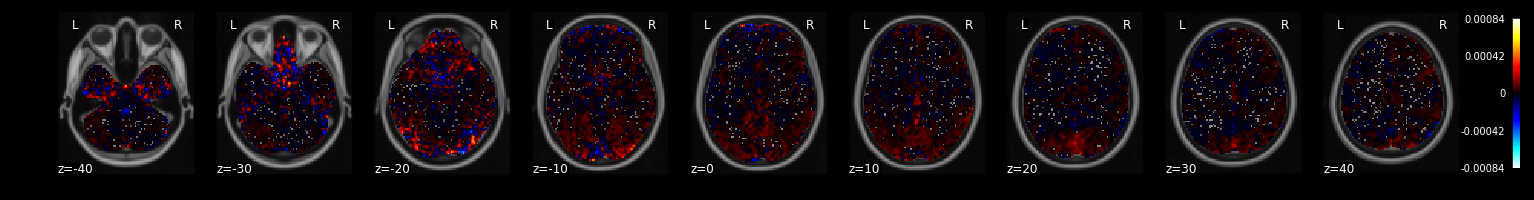

In [174]:
dom_unl_svm_stats = unlabeled_dom_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.76
Accuracy SE:        0.08
Accuracy p-value:   0.00
Sensitivity:        0.83
Specificity:        0.68
AUC:                0.82
PPV:                0.72
------------------------


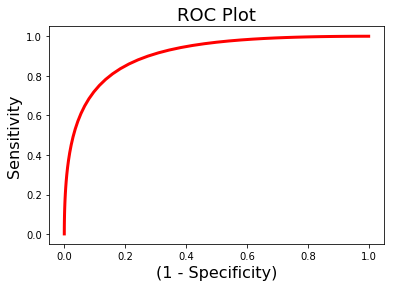

In [176]:
roc = Roc(input_values=dom_unl_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=dom_unl_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#ONE VER THE OTHERS===============================================

In [ ]:
#anx v emp and dom================================================

In [32]:
anx_empdom_data_temp = anxiety_data.append(empathy_data)
anx_empdom_data = anx_empdom_data_temp.append(dominance_data)

In [78]:
anx_empdom_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(anxiety_data)),
                                               np.zeros(len(anx_empdom_data_temp))]))

In [36]:
len(anx_empdom_data.Y)

123

In [70]:
sub1 = subject_id[0:41]
subject_id = sub1.append(sub1).reset_index(drop=True)
subject_id = subject_id.append(sub1).reset_index(drop=True)

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.63


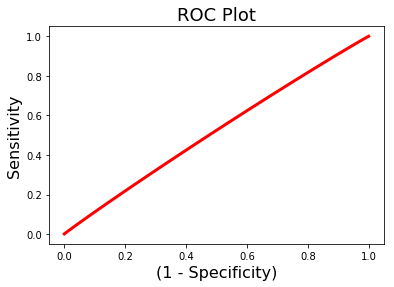

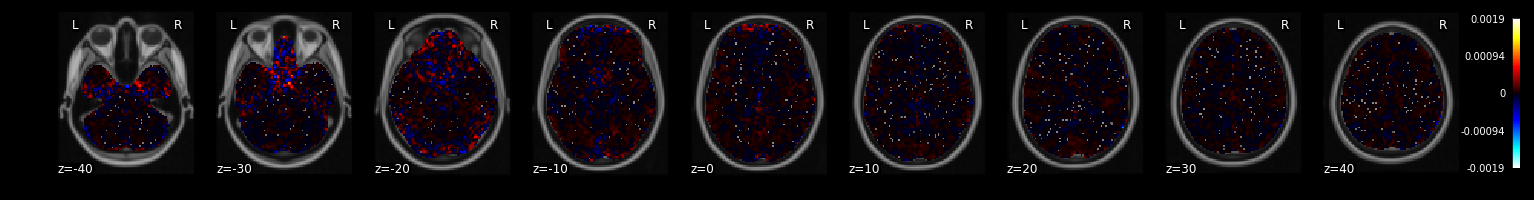

In [79]:
anx_empdom_svm_stats = anx_empdom_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.68
Accuracy SE:        0.06
Accuracy p-value:   0.00
Sensitivity:        0.07
Specificity:        0.99
AUC:                0.50
PPV:                0.75
------------------------


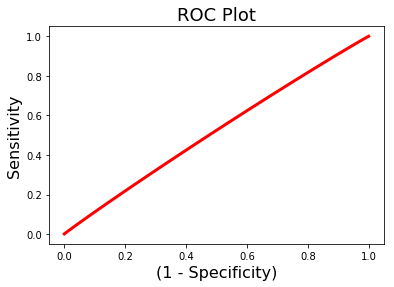

In [61]:
roc = Roc(input_values=anx_empdom_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=anx_empdom_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#emp v dom and anx================================================

In [72]:
emp_domanx_data_temp = empathy_data.append(dominance_data)
emp_domanx_data = emp_domanx_data_temp.append(anxiety_data)
emp_domanx_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(empathy_data)),
                                               np.zeros(len(emp_domanx_data_temp))]))

In [73]:
#check length
len(emp_domanx_data.Y)

123

In [ ]:
#use same sub df
#sub1 = subject_id[0:41]
#subject_id = sub1.append(sub1).reset_index(drop=True)
#subject_id = subject_id.append(sub1).reset_index(drop=True)

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.64


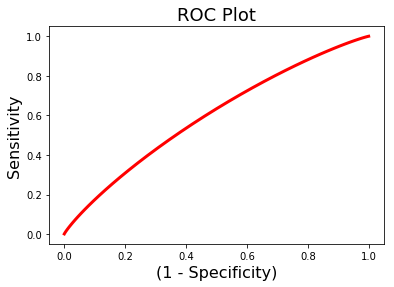

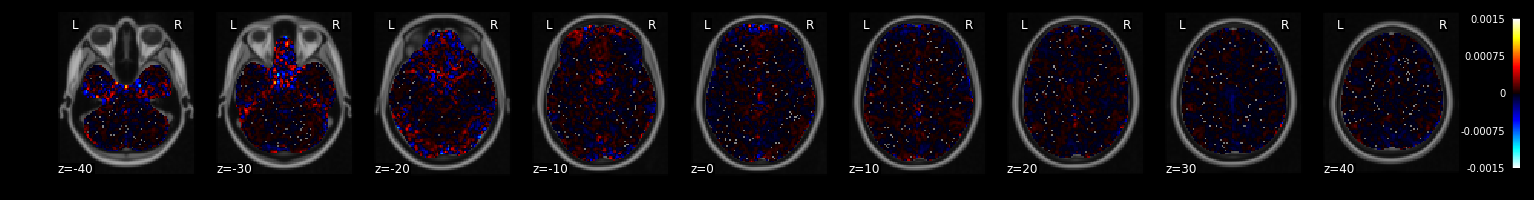

In [74]:
emp_domanx_svm_stats = emp_domanx_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.67
Accuracy SE:        0.06
Accuracy p-value:   0.00
Sensitivity:        0.07
Specificity:        0.98
AUC:                0.54
PPV:                0.60
------------------------


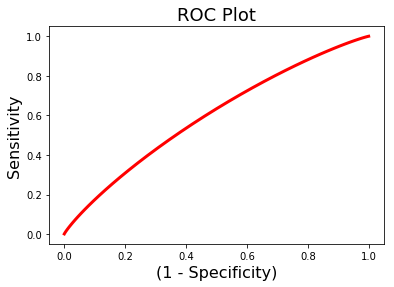

In [75]:
roc = Roc(input_values=emp_domanx_svm_stats['dist_from_hyperplane_xval'],
            binary_outcome=emp_domanx_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

In [ ]:
#Dom v anx and emp==================================================================

In [80]:
dom_anxemp_data_temp = dominance_data.append(anxiety_data)
dom_anxemp_data = dom_anxemp_data_temp.append(empathy_data)
dom_anxemp_data.Y  = pd.DataFrame(np.concatenate([np.ones(len(dominance_data)),
                                               np.zeros(len(dom_anxemp_data_temp))]))

In [81]:
#check length
len(dom_anxemp_data.Y)

123

In [ ]:
#use same sub df
#sub1 = subject_id[0:41]
#subject_id = sub1.append(sub1).reset_index(drop=True)
#subject_id = subject_id.append(sub1).reset_index(drop=True)

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


overall accuracy: 1.00
overall CV accuracy: 0.65


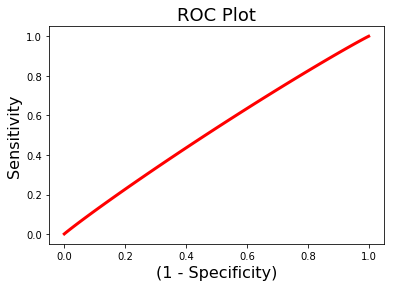

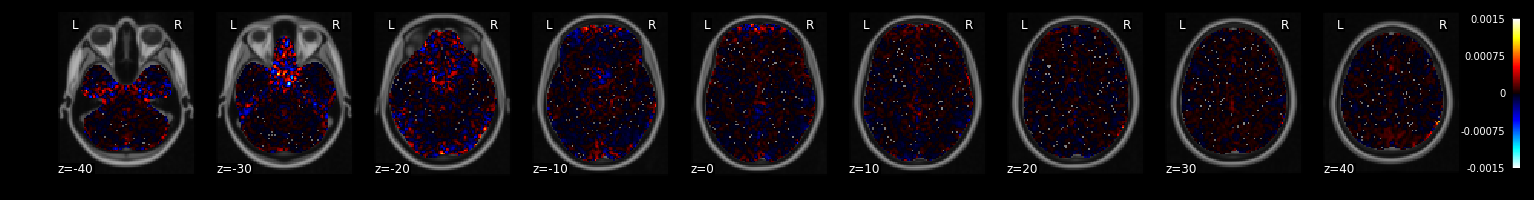

In [82]:
dom_anxemp_svm_stats = dom_anxemp_data.predict(algorithm='svm',cv_dict={'type': 'kfolds','n_folds': 5, 
                                    'subject_id':subject_id},**{'kernel':"linear"})

In [83]:
roc = Roc(input_values=dom_anxemp_data_stats['dist_from_hyperplane_xval'],
            binary_outcome=dom_anxemp_data_svm_stats['Y'].astype(bool))
roc.plot()
roc.summary()

NameError: name 'dom_anxemp_data_stats' is not defined

In [ ]:
#ALL DATA=======================================================

In [4]:
dat = Brain_Data()
for fname in filelist:
    print(fname)
    _dat = Brain_Data(data=fname)
    data = dat.append(_dat)

/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000442.anxiety.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000442.dominance.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000442.empathy.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000442.unlabeled.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000443.anxiety.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000443.dominance.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000443.empathy.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000443.unlabeled.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000452.anxiety.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000452.dominance.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000452.empathy.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000452.unlabeled.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000453.anxiety.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000453.dominance.nii
/Users/daisyburr/nil

/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000605.empathy.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000605.unlabeled.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000606.anxiety.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000606.dominance.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000606.empathy.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000606.unlabeled.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000613.anxiety.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000613.dominance.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000613.empathy.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000613.unlabeled.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000619.anxiety.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000619.dominance.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000619.empathy.nii
/Users/daisyburr/nilearn_data/WHICHFEAR/SUBJECTS/A000619.unlabeled.nii
/Users/daisyburr/nil

In [10]:
print(len(data))

238955


In [54]:
print(data.shape())

(164, 238955)


In [55]:
data.mean()

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [57]:
data.std()

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [59]:
print(data.mean().shape())  

(238955,)
